## Natural Language Processing Resources and Libraries

### Resources

[Natural Language Processing Resources](https://github.com/keon/awesome-nlp)

[State of the Art in Natural Language Processing](https://github.com/sebastianruder/NLP-progress)

[NLTK Book](http://www.nltk.org/book/)




### Libraries

[Introduction to SpaCy](https://course.spacy.io/en/)

[SpaCy Library](https://spacy.io/usage/v3)

[Introduction to NLTK](https://pythonprogramming.net/tokenizing-words-sentences-nltk-tutorial/)

[NLTK Library](https://github.com/nltk)

[Natural Language Processing using PyTorch](https://github.com/joosthub/PyTorchNLPBook)

[Natural Language Processing using TensorFlow](https://github.com/PacktPublishing/Advanced-Natural-Language-Processing-with-TensorFlow-2)

## Working with string

Text-based information is stored as string data. 
In order to work with string data in statistical applications, it is necessary to restructure data based on our requirement.

[Pandas reference Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Python Data Science Book](https://github.com/jakevdp/PythonDataScienceHandbook)

In [1]:
#Loading of Data

import pandas as pd
import pprint
pp = pprint.PrettyPrinter()

data_df = pd.read_csv('https://github.com/LawrenceDuan/IMDb-Review-Analysis/raw/master/IMDb_Reviews.csv', sep=',')
pp.pprint(data_df.head())

                                              review  sentiment
0  My family and I normally do not watch local mo...          1
1  Believe it or not, this was at one time the wo...          0
2  After some internet surfing, I found the "Home...          0
3  One of the most unheralded great works of anim...          1
4  It was the Sixties, and anyone with long hair ...          0


In [2]:
pp.pprint(data_df['review'][data_df.index==4].values[0])

('It was the Sixties, and anyone with long hair and a hip, distant attitude '
 "could get money to make a movie. That's how Michael Sarne, director of this "
 'colossal flop, was able to get the job. Sarne is one of the most supremely '
 'untalented people ever given a dollar to make a movie. In fact, the whole '
 'studio must have been tricked into agreeing to hire a guy who had made '
 "exactly one previous film, a terribly precious 60's-hip black and white "
 'featurette called Joanna. That film starred the similarly talentless '
 'actress/waif Genevieve Waite who could barely speak an entire line without '
 'breaking into some inappropriate facial expression or bat-like twitter. '
 'Sarne, who was probably incapable of directing a cartoon, never mind a '
 "big-budget Hollywood film, was in way over his head. David Giler's book is "
 'the best place to go to find out how the faux-infant terrible Sarne was able '
 "to pull the wool over everyone's eyes. If there is ever an historical

In [4]:
# String Concatenation

firstname = 'Joe'
lastname = 'Biden'
whitespace = ' '
suffix = str(3)

print(firstname + whitespace+ lastname + whitespace + suffix)

Joe Biden 3


In [5]:
# String Formatting

name = 'Joe'
print("My name is, " + name)
print("My name is, %s" %name)
print("My name is, {}".format(name))
print(f"My name is, {name}")

My name is, Joe
My name is, Joe
My name is, Joe
My name is, Joe


In [6]:
print(f"Say it ain't so, {firstname} {lastname}")

Say it ain't so, Joe Biden


In [5]:

# Approach 1:
length_list = []
for index, row in data_df.iterrows():
    length_list.append(len(row['review']))

data_df['review_length'] = length_list
data_df['review_length'].max()

13704

In [6]:
# Find out the minimum and maximum review comments

text_short = data_df['review'][data_df['review_length'] == data_df['review_length'].min()].values[0]
text_long = data_df['review'][data_df['review_length'] == data_df['review_length'].max()].values[0]


In [7]:
pp.pprint(text_short)

'Read the book, forget the movie!'


In [9]:
pp.pprint(text_long)

('Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero '
 'and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag '
 'Team Table Match against Eddie Guerrero and Chris Benoit. According to the '
 'rules of the match, both opponents have to go through tables in order to get '
 'the win. Benoit and Guerrero heated up early on by taking turns hammering '
 'first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the '
 'wind out of the Dudley brother. Spike tried to help his brother, but the '
 'referee restrained him while Benoit and Guerrero ganged up on him in the '
 'corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. '
 'Spike dashed into the ring and somersaulted over the top rope onto Guerrero '
 'on the outside! After recovering and taking care of Spike, Guerrero slipped '
 'a table into the ring and helped the Wolverine set it up. The tandem then '
 'set up for a double superplex from the middle rope

## Preprocessing

* Tokenization 
* White space
* Numbers
* Upper / Lower Case
* Abbreviations
* Stopwords

### Tokenization

Defination: Split the text into words


Here we transform string data into data objects we can work with.

In [12]:
text_short

'Read the book, forget the movie!'

In [8]:
# Word Tokenization using split command

text_list = text_short.split(' ')
pp.pprint(text_list)

# Output is not correct as "," is attached with the book token and ! is attached to the movie token

['Read', 'the', 'book,', 'forget', 'the', 'movie!']


In [9]:
# Creating a dictionary with index

text_dict = dict()
for idx, word in enumerate(text_list):
    text_dict[word] = idx

print(text_dict)

# Issue: The numbering are not proper as it is only considering the last occurence and ignoring the previous one in the dictionary
# Dictionary is having unqiue values so it is replacing the previous occurence with the last occurence

{'Read': 0, 'the': 4, 'book,': 2, 'forget': 3, 'movie!': 5}


In [10]:
# Creating a dictionary considering the first occurence

vocab_dict = dict()
counter = 0
for word in text_list:
    if word not in vocab_dict.keys():
        vocab_dict[word] = counter
        counter +=1

print(vocab_dict)

{'Read': 0, 'the': 1, 'book,': 2, 'forget': 3, 'movie!': 4}


In [11]:
# Tokenization using NLTK Library
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import PorterStemmer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [12]:
# Word Tokenization using NLTK Library

text_list = word_tokenize(text_short)
print(text_list)

['Read', 'the', 'book', ',', 'forget', 'the', 'movie', '!']


In [13]:
# Sentence Tokenization

text_long.split('.')

['Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit',
 ' According to the rules of the match, both opponents have to go through tables in order to get the win',
 ' Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray',
 ' A German suplex by Benoit to Bubba took the wind out of the Dudley brother',
 ' Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner',
 ' With Benoit stomping away on Bubba, Guerrero set up a table outside',
 ' Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up',
 ' The tandem then set up for a double superplex from the middle rope which would have pu

In [19]:
# Sentence Tokenization using NLTK Library

sent_long = sent_tokenize(text_long)
print(sent_long)

# As an output an array of sentences will be provided

['Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit.', 'According to the rules of the match, both opponents have to go through tables in order to get the win.', 'Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray.', 'A German suplex by Benoit to Bubba took the wind out of the Dudley brother.', 'Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner.', 'With Benoit stomping away on Bubba, Guerrero set up a table outside.', 'Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside!', 'After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up.', 'The tandem then set up for a double superplex from the middle rope which would have put Bu

In [14]:
# Word Tokenization and Punctuation removal using NLTK Library

text_list = wordpunct_tokenize(text_short)
print(text_list)

['Read', 'the', 'book', ',', 'forget', 'the', 'movie', '!']


[Difference between word_tokenize and wordpunct_tokenize](https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize)


In [21]:
# Difference between word_tokenize and wordpunct_tokenize
Example = "I'm a dog and it's great! You're cool and Sandy's book is big. Don't tell her, you'll regret it! 'Hey', she'll say!"

# Wordpunkt_tokenize uses Regular Expression (\w+|[^\w\s]+) for splitting the input
# Word_tokenize uses TreeBank tokenizer

word_tokenize_example = word_tokenize(Example)
print(word_tokenize_example)

word_punkt_tokenize_example = wordpunct_tokenize(Example)
print(word_punkt_tokenize_example)

# Wordpunkt actually splitting up the punctuation also as a token by default which was not the case with word_tokenize

['I', "'m", 'a', 'dog', 'and', 'it', "'s", 'great', '!', 'You', "'re", 'cool', 'and', 'Sandy', "'s", 'book', 'is', 'big', '.', 'Do', "n't", 'tell', 'her', ',', 'you', "'ll", 'regret', 'it', '!', "'Hey", "'", ',', 'she', "'ll", 'say', '!']
['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', "'", 'Hey', "',", 'she', "'", 'll', 'say', '!']


### Punctuation

The use of punctuation can lead to further complexities.

As punctuation won't help for any further task

In [22]:
text_list

['Read', 'the', 'book', ',', 'forget', 'the', 'movie', '!']

In [22]:
# Tailored made punctuation removal
# Drawback a lot of profiling needs to be done to understand

nopunct_list = []
for word in text_list:
    no_punct = word.replace('!','')
    nopunct_list.append(no_punct)

print(nopunct_list)

['Read', 'the', 'book', ',', 'forget', 'the', 'movie', '']


In [15]:
# Tailored made punctuation removal

no_punct_list = []
for word in text_list:
    word_clean = word.replace('.','').replace('!', '').replace('?','').replace(',','')
    no_punct_list.append(word_clean)

print(no_punct_list)

['Read', 'the', 'book', '', 'forget', 'the', 'movie', '']


In [16]:
# Punctuation Removal

# Approach 1:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(text_short)

['Read', 'the', 'book', 'forget', 'the', 'movie']

In [17]:
# Approach 2:
import nltk
words_punctuation = nltk.word_tokenize(text_short)
words_punctuation = [word for word in words_punctuation if word.isalpha()]

print(words_punctuation)

['Read', 'the', 'book', 'forget', 'the', 'movie']


In [18]:
# Appraoch 3:
from nltk.tokenize import punkt

cleaned_words = list(filter(lambda token : punkt.PunktToken(token).is_non_punct,text_list))
print(cleaned_words)

['Read', 'the', 'book', 'forget', 'the', 'movie']


### Regular Expressions

> "**A regular expression** is a sequence of characters that define a search pattern. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory."

* [Regex Training](https://regexone.com/)
* [Documentation](https://docs.python.org/3/howto/regex.html)

In [19]:

import re
nopunct_list = []
for word in text_list:
      word_clean = re.sub(r'[^\w\s]','',word) # If the word is not blank and not a word then replace it with blank
      nopunct_list.append(word_clean)

print(nopunct_list)

['Read', 'the', 'book', '', 'forget', 'the', 'movie', '']


### Stopwords and Lower case
>"In computing, stop words are words which are filtered out before or after processing of natural language data. Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list."

Wikipedia "Stopwords"

CORPUS is a collection of DOCUMENTS 


A DOCUMENT is a collection of WORDS


WORD is a collection of CHARACTERS

In [20]:
# Stopwords 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
text_list = word_tokenize(text_short)

for word in text_list:
    if word in STOPWORDS:
        print('STOPWORD: ' + word.lower())

STOPWORD: the
STOPWORD: the


In [80]:
text_short

'Read the book, forget the movie!'

In [30]:
text_list = word_tokenize(text_long)

for word in text_list:
    if word in STOPWORDS:
        print('STOPWORD: ' + word.lower())

STOPWORD: and
STOPWORD: and
STOPWORD: and
STOPWORD: off
STOPWORD: with
STOPWORD: a
STOPWORD: against
STOPWORD: and
STOPWORD: to
STOPWORD: the
STOPWORD: of
STOPWORD: the
STOPWORD: both
STOPWORD: have
STOPWORD: to
STOPWORD: through
STOPWORD: in
STOPWORD: to
STOPWORD: the
STOPWORD: and
STOPWORD: up
STOPWORD: on
STOPWORD: by
STOPWORD: and
STOPWORD: then
STOPWORD: by
STOPWORD: to
STOPWORD: the
STOPWORD: out
STOPWORD: of
STOPWORD: the
STOPWORD: to
STOPWORD: his
STOPWORD: but
STOPWORD: the
STOPWORD: him
STOPWORD: while
STOPWORD: and
STOPWORD: up
STOPWORD: on
STOPWORD: him
STOPWORD: in
STOPWORD: the
STOPWORD: on
STOPWORD: up
STOPWORD: a
STOPWORD: into
STOPWORD: the
STOPWORD: and
STOPWORD: over
STOPWORD: the
STOPWORD: on
STOPWORD: the
STOPWORD: and
STOPWORD: of
STOPWORD: a
STOPWORD: into
STOPWORD: the
STOPWORD: and
STOPWORD: the
STOPWORD: it
STOPWORD: up
STOPWORD: then
STOPWORD: up
STOPWORD: for
STOPWORD: a
STOPWORD: from
STOPWORD: the
STOPWORD: which
STOPWORD: have
STOPWORD: through
STOPWORD: 

In [31]:
for word in text_list:
    print(word.lower())

match
1
:
tag
team
table
match
bubba
ray
and
spike
dudley
vs
eddie
guerrero
and
chris
benoit
bubba
ray
and
spike
dudley
started
things
off
with
a
tag
team
table
match
against
eddie
guerrero
and
chris
benoit
.
according
to
the
rules
of
the
match
,
both
opponents
have
to
go
through
tables
in
order
to
get
the
win
.
benoit
and
guerrero
heated
up
early
on
by
taking
turns
hammering
first
spike
and
then
bubba
ray
.
a
german
suplex
by
benoit
to
bubba
took
the
wind
out
of
the
dudley
brother
.
spike
tried
to
help
his
brother
,
but
the
referee
restrained
him
while
benoit
and
guerrero
ganged
up
on
him
in
the
corner
.
with
benoit
stomping
away
on
bubba
,
guerrero
set
up
a
table
outside
.
spike
dashed
into
the
ring
and
somersaulted
over
the
top
rope
onto
guerrero
on
the
outside
!
after
recovering
and
taking
care
of
spike
,
guerrero
slipped
a
table
into
the
ring
and
helped
the
wolverine
set
it
up
.
the
tandem
then
set
up
for
a
double
superplex
from
the
middle
rope
which
would
have
put
bubba
through
t

lined
up
against
each
other
in
a
triple
threat
match
with
the
undisputed
championship
hanging
in
the
balance
.
taker
and
the
rock
got
face
to
face
with
kurt
angle
begging
for
some
attention
off
to
the
side
.
he
got
attention
in
the
form
of
a
beat
down
form
the
two
other
men
.
soon
after
,
taker
spilled
out
of
the
ring
and
the
rock
brawled
with
angle
.
angle
gave
a
series
of
suplexes
that
took
down
rock
,
but
the
great
one
countered
with
a
ddt
that
managed
a
two-count
.
the
fight
continued
outside
the
ring
with
taker
coming
to
life
and
clotheslining
angle
and
repeatedly
smacking
the
rock
.
taker
and
rock
got
into
it
back
into
the
ring
,
and
taker
dropped
the
rock
with
a
sidewalk
slam
to
get
a
two-count
.
rock
rebounded
,
grabbed
taker
by
the
throat
and
chokeslammed
him
!
angle
broke
up
the
pin
attempt
that
likely
would
have
given
the
rock
the
title
.
the
rock
retaliated
by
latching
on
the
ankle
lock
to
kurt
angle
.
angle
reversed
the
move
and
rock
bottomed
the
people
's
champion
.
soon


### Core concept: the Corpus - Github for NLP

Organization content: \\
Term / Token -> Doc -> Corpus


Datasets vs Corpora

Datasets: RAW corpus \\
Corpora: Annotated corpus



**Annnotations:** \\

* Part-of-speech tagging (or POS tagging) \\

* Phonetic annotation \\
Adding information about how a word in a spoken corpus was pronounced. \\
> Prosodic annotation — \\
Adding information about prosodic features such as stress, intonation and pauses.\
>Syntactic annotation —\
Adding information about how a given sentence is parsed, in terms of syntactic analysis into such units such phrases and clauses

* Semantic annotation \\
Adding information about the semantic category of words — the noun cricket as a term for a sport and as a term for an insect belong to different semantic categories, although there is no difference in spelling or pronunciation.

* Pragmatic annotation \\
Adding information about the kinds of speech act (or dialogue act) that occur in a spoken dialogue — thus the utterance okay on different occasions may be an acknowledgement, a request for feedback, an acceptance, or a pragmatic marker initiating a new phase of discussion.

* Discourse annotation \\
Adding information about anaphoric links in a text, for example connecting the pronoun them and its antecedent the horses in: I'll saddle the horses and bring them round. [an example from the Brown corpus]

* Stylistic annotation
Adding information about speech and thought presentation (direct speech, indirect speech, free indirect thought, etc.)

* Lexical annotation
Adding the identity of the lemma of each word form in a text — i.e. the base form of the word, such as would occur as its headword in a dictionary (e.g. lying has the lemma LIE).

Example:
[OntoNotes](https://catalog.ldc.upenn.edu/LDC2013T19)


[Further reading](http://users.ox.ac.uk/~martinw/dlc/chapter2.htm#:~:text=Corpus%20annotation%20is%20the%20practice,words%20in%20a%20text%20belong)

### Basic Process with SpaCy Library

[SpaCy model *example*](https://spacy.io/models/en)

SpaCy uses:
* OntoNotes Corpus for English PoS Tagger
* TIGER Treebank for German PoS Tagger

In [25]:
pip install spacy

In [28]:

import spacy
# Load corpus - Spacey Uses OntoNotes

nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
  Using cached pathy-0.6.2-py3-none-any.whl (42 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)

  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)


In [24]:
# Processing of raw Text
doc = nlp(text_short)

NameError: name 'nlp' is not defined

[List of PoS Tags](https://universaldependencies.org/docs/en/pos/)


[Publication 1 of Dependency Parser Tags](https://worksheets.codalab.org/rest/bundles/0x953afe5537074b4b9cd3c57e08e2d865/contents/blob/StanfordDependenciesManual.pdf)


[Publication 2 of Dependency Parser Tags](http://www.mathcs.emory.edu/~choi/doc/cu-2012-choi.pdf)


[List of Dependency Parse Tags](https://universaldependencies.org/docs/en/dep/)

In [83]:
# Extract information

for token in doc:
    print("*************************")
    print(f"token.text: {token.text}")
    print(f"token.lemma_: {token.lemma_}")
    print(f"token.pos_: {token.pos_}")
    '''print(f"token.tag_: {token.tag_}")
    print(f"token.dep_: {token.dep_}")
    print(f"token.shape_: {token.shape_}")
    '''
    print(f"token.is_alpha: {token.is_alpha}") # Is Alphabet
    print(f"token.is_stop: {token.is_stop}") # Is Stopwords

*************************
token.text: Read
token.lemma_: read
token.pos_: VERB
token.is_alpha: True
token.is_stop: False
*************************
token.text: the
token.lemma_: the
token.pos_: DET
token.is_alpha: True
token.is_stop: True
*************************
token.text: book
token.lemma_: book
token.pos_: NOUN
token.is_alpha: True
token.is_stop: False
*************************
token.text: ,
token.lemma_: ,
token.pos_: PUNCT
token.is_alpha: False
token.is_stop: False
*************************
token.text: forget
token.lemma_: forget
token.pos_: VERB
token.is_alpha: True
token.is_stop: False
*************************
token.text: the
token.lemma_: the
token.pos_: DET
token.is_alpha: True
token.is_stop: True
*************************
token.text: movie
token.lemma_: movie
token.pos_: NOUN
token.is_alpha: True
token.is_stop: False
*************************
token.text: !
token.lemma_: !
token.pos_: PUNCT
token.is_alpha: False
token.is_stop: False


### Lemmatization

return the root of a word

[Wordnet](http://wordnetweb.princeton.edu/)

### Stemming Vs Lemmatization

In [42]:
#Stemmer Example

# Porter Stemmer
import nltk

from nltk.stem.porter import *
porter_stemmer = PorterStemmer()
words = ['run','runner','running','ran','runs','sleeping','fairly']
for word in words:
    print(word +' --> '+ porter_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
sleeping --> sleep
fairly --> fairli


In [44]:
# Snowball Stemmer
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
snowball_stemmer = SnowballStemmer(language='english')
words = ['run','runner','running','ran','runs','sleeping','fairly']

for word in words:
    print(word+' --> '+snowball_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
sleeping --> sleep
fairly --> fair


In [45]:
# Lemmatization Example

text = "run runner running ran runs sleeping fairly"
doc = nlp(text)
for token in doc: 
    print(token.text +' --> '+ token.lemma_)

run --> run
runner --> runner
running --> running
ran --> run
runs --> run
sleeping --> sleep
fairly --> fairly


## Bag Of Words

## Feature Engineering

![alternativer Text](https://miro.medium.com/max/1400/1*MeSYCKGDOdwkJKVZKxJuvg.png)

In [34]:
# Feature Selection

def extract_NN(text:str):
    """ Extract Nouns and filter out stopwords"""
    NN_list = []
    doc = nlp(text)
    for token in doc:
        if token.pos_ == 'NOUN' and token.is_stop is not True:
            NN_list.append(token.lemma_)
  
    return NN_list

In [35]:
extract_NN(text_short)

NameError: name 'nlp' is not defined

In [36]:
# Feature Expansion

# Count occurrences of individual tokens over corpus
NN_list = extract_NN(text_long)

count_dict = dict()
for word in sorted(NN_list):
    if word not in count_dict.keys():
        count_dict[word] = 1
    else:
        count_dict[word] +=1

NameError: name 'nlp' is not defined

In [37]:
pd.DataFrame.from_dict(count_dict, orient='index').T

NameError: name 'count_dict' is not defined

In [38]:
# Count Occurrence of individual terms over docs in corpus
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
countvectorizer = CountVectorizer(analyzer = 'word')

In [39]:
print(sent_long)

['Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit.', 'According to the rules of the match, both opponents have to go through tables in order to get the win.', 'Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray.', 'A German suplex by Benoit to Bubba took the wind out of the Dudley brother.', 'Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner.', 'With Benoit stomping away on Bubba, Guerrero set up a table outside.', 'Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside!', 'After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up.', 'The tandem then set up for a double superplex from the middle rope which would have put Bu

In [40]:
count_wm = countvectorizer.fit_transform(sent_long)
count_tokens = countvectorizer.get_feature_names()


C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
countvect_df = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
countvect_df

,about,according,advantage,after,again,against,all,allowed,allowing,an,...,withstood,wolverine,wood,world,would,wwe,y2j,years,you,young
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Term Frequency - inverted Document Frequency (tf-idf)
>"In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus."

[Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#:~:text=In%20information%20retrieval%2C%20tf%E2%80%93idf,in%20a%20collection%20or%20corpus.) \\

Justification

1.   TF: \\

*   > Raw count of a *term* in a *document*
*   $tf = log(1+freq(term,document))$


2.   Idf: \\
*   Adjust the individual term weight by scarcity factor of number of *documents* featuring the *term* of choice. 
*   Ranges from 0 (term occurs very often) to 1 (term occurs rarely)
*   >"Idf was introduced, as "term specificity", by Karen Spärck Jones in a 1972 paper. Although it has worked well as a heuristic, its theoretical foundations have been troublesome for at least three decades afterward, with many researchers trying to find information theoretic justifications for it."
[Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#:~:text=In%20information%20retrieval%2C%20tf%E2%80%93idf,in%20a%20collection%20or%20corpus.) 
*  $idf(t) = log(N/(tf + 1))$ 
*  control large values and shift against 0 in numerator

TF-IDF = $log(1+freq(term,document))+log(N/(tf + 1))$


In [61]:
import math
math.log(1)

0.0

In [74]:
sent_long

['Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit.',
 'According to the rules of the match, both opponents have to go through tables in order to get the win.',
 'Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray.',
 'A German suplex by Benoit to Bubba took the wind out of the Dudley brother.',
 'Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner.',
 'With Benoit stomping away on Bubba, Guerrero set up a table outside.',
 'Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside!',
 'After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up.',
 'The tandem then set up for a double superplex from the middle rope which would hav

In [47]:
tfidfvectorizer = TfidfVectorizer(analyzer='word')

tfidf_model = tfidfvectorizer.fit_transform(sent_long)

tfidf_tokens = tfidfvectorizer.get_feature_names()
tfidf_df = pd.DataFrame(data = tfidf_model.toarray(),columns = tfidf_tokens)
tfidf_df

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about,according,advantage,after,again,against,all,allowed,allowing,an,...,withstood,wolverine,wood,world,would,wwe,y2j,years,you,young
0,0.0,0.000000,0.0,0.0,0.0,0.146855,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.304776,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
143,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
144,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.26129,0.0,0.0,0.0,0.0
145,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


## Sentiment Analysis

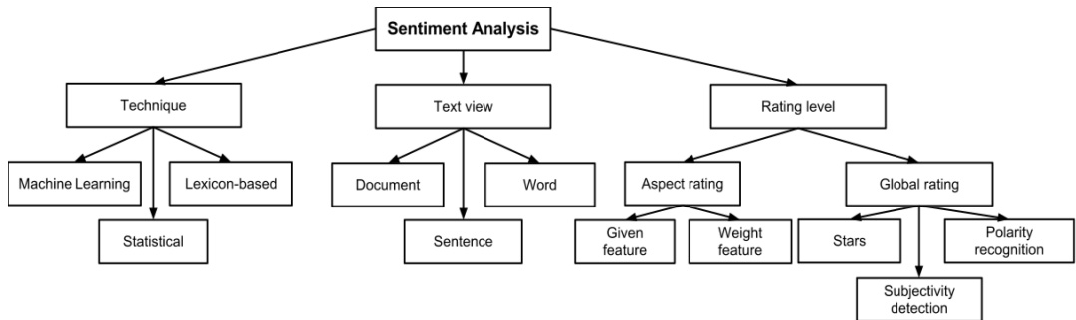


### Research / model setup questions:
1.    Do we have data?
2.    Do we have labels?
3.    What do our labels represent?
      *    Sentiment: good or bad
      *    Spam: relevant or irrelevant
      *    Objectivity: true or not true
      *    Appropriatness: flag or not flag
      *    Fraud Detection: flag or not flag  
4.   Preprocess data
5.   **Fit the model and optimise results**
6.   Interpret the results

In [42]:
# Load all relevant dependancies

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string

lemmatizer=WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
# We only preprocess words per document
# We control for stopwords and punctuation, and we use lemmatized word representations
# We define our docs to be the whole reviews, not just the sentences

def word_preprocessor(word:str):
    """Returns a preprocessed word token"""

    if word not in STOPWORDS: # Stop Words Removal
        if word not in string.punctuation: # Punctuation Removal
            if word != '/><br':
            lemma = lemmatizer.lemmatize(word) # Lemmatization
            lemma = lemma.replace(',','').replace('.','') # Punctuation removal
            token = lemma.lower() # Lower Case
            return token

IndentationError: expected an indented block (<ipython-input-43-529c0c49eabb>, line 11)

In [44]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.2)

In [67]:
train_df

,review,sentiment,review_length
32579,I am a fan of Randolph Scott Westerns. While s...,1,1288
39180,"I generally find Loretta Young hard to take, t...",1,1126
17824,CCCC is the first good film in Bollywood of 20...,1,2325
14281,Dreck about three beautiful women in Californi...,0,761
48156,"In watching this early DeMille work, it was on...",1,574
...,...,...,...
36785,i would never have thought that it would be po...,1,264
27165,"""The next Karate Kid"" is an outstanding movie ...",1,507
24604,"Yes, you can look at Babette's Feast as some s...",1,2459
35339,Regarded as another one of the recent over-the...,1,849


In [45]:
processed_list = list()

for index, row in train_df.iterrows():
    sentence_list = []
    for word in row['review'].split(" "): # Tokenization
        token = word_preprocessor(word)
        if token:
            sentence_list.append(token)
    processed_list.append(sentence_list)
train_df['review_prep']=processed_list

NameError: name 'word_preprocessor' is not defined

In [71]:
'''Important!!!'''
# Pre-processing steps for Testing data should be same as Training data 

processed_list = list()

for index, row in test_df.iterrows():
    sentence_list = []
    for word in row['review'].split(" "):
        token = word_preprocessor(word)
        if token:
            sentence_list.append(token)
    processed_list.append(sentence_list)
test_df['review_prep']=processed_list

/var/folders/7q/tq2537md2sqfg4t7yw28l45w0000gn/T/ipykernel_12510/3909395922.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['review_prep']=processed_list


In [72]:
train_df.head()

,review,sentiment,review_length,review_prep
32579,I am a fan of Randolph Scott Westerns. While s...,1,1288,"[i, fan, randolph, scott, westerns, while, ama..."
39180,"I generally find Loretta Young hard to take, t...",1,1126,"[i, generally, find, loretta, young, hard, tak..."
17824,CCCC is the first good film in Bollywood of 20...,1,2325,"[cccc, first, good, film, bollywood, 2001, whe..."
14281,Dreck about three beautiful women in Californi...,0,761,"[dreck, three, beautiful, woman, california, g..."
48156,"In watching this early DeMille work, it was on...",1,574,"[in, watching, early, demille, work, reinforce..."


In [108]:
doc = nlp(str(train_df['review']))
for token in doc: 
    print(token.text +' --> '+ token.lemma_)

32579 --> 32579
    -->    
I --> I
am --> be
a --> a
fan --> fan
of --> of
Randolph --> Randolph
Scott --> Scott
Westerns --> Westerns
. --> .
While --> while
s --> s
... --> ...

 --> 

39180 --> 39180
    -->    
I --> I
generally --> generally
find --> find
Loretta --> Loretta
Young --> Young
hard --> hard
to --> to
take --> take
, --> ,
t --> t
... --> ...

 --> 

17824 --> 17824
    -->    
CCCC --> CCCC
is --> be
the --> the
first --> first
good --> good
film --> film
in --> in
Bollywood --> Bollywood
of --> of
20 --> 20
... --> ...

 --> 

14281 --> 14281
    -->    
Dreck --> Dreck
about --> about
three --> three
beautiful --> beautiful
women --> woman
in --> in
Californi --> Californi
... --> ...

 --> 

48156 --> 48156
    -->    
In --> in
watching --> watch
this --> this
early --> early
DeMille --> DeMille
work --> work
, --> ,
it --> it
was --> be
on --> on
... --> ...

                                --> 
                               
... --> ...
                      

In [48]:
tfidf_model = tfidfvectorizer.fit_transform(train_df['review'])

tfidf_tokens = tfidfvectorizer.get_feature_names()
tfidf_df = pd.DataFrame(data = tfidf_model.toarray(),columns = tfidf_tokens)
tfidf_df

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MemoryError: Unable to allocate 27.8 GiB for an array with shape (40000, 93231) and data type float64

In [77]:
y_train = train_df['sentiment']


In [79]:
from sklearn.linear_model import LogisticRegression

clf_rf = LogisticRegression()
clf_rf.fit(tfidf_df, y_train)

LogisticRegression()

In [87]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, clf_rf.predict(tfidf_df)))


0.9305


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, clf_rf.predict(tfidf_df))

array([[18410,  1533],
       [ 1247, 18810]])

In [100]:
test_df

,review,sentiment,review_length,review_prep
11183,I like both this version of DORIAN GRAY and th...,1,666,"[i, like, version, dorian, gray, mgm, version,..."
907,This movie has very good acting by virtually a...,1,705,"[this, movie, good, acting, virtually, cast, g..."
15152,A true Gothic Horror Trash Classic!<br /><br /...,0,1442,"[a, true, gothic, horror, trash, classic!<br, ..."
36334,The tourist season has just ended on a remote ...,1,4640,"[the, tourist, season, ended, remote, island, ..."
10189,Positively ridiculous film.<br /><br />If Dori...,0,810,"[positively, ridiculous, film<br, />if, doris,..."
...,...,...,...,...
12540,"Blake Edwards' legendary fiasco, begins to see...",0,1188,"[blake, edwards', legendary, fiasco, begin, se..."
13178,I'm proud to say I'm a student at UW-Milwaukee...,1,912,"[i'm, proud, say, i'm, student, uw-milwaukee, ..."
12119,this movie was clearly done poorly and in a ru...,0,1058,"[movie, clearly, done, poorly, rush, i, realiz..."
40717,The message of a world on the brink of war is ...,1,1978,"[the, message, world, brink, war, disregarded,..."


In [101]:
tfidf_model_test = tfidfvectorizer.fit_transform(test_df['review'])

tfidf_tokens_test = tfidfvectorizer.get_feature_names()
tfidf_df_test = pd.DataFrame(data = tfidf_model_test.toarray(),columns = tfidf_tokens_test)
tfidf_df_test

,00,000,00001,007,0093638,00am,00s,01,02,0230,...,æbler,écran,élan,émigré,émigrés,était,étienne,óli,örnek,über
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.122744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
y_test = test_df['sentiment']

In [103]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, clf_rf.predict(tfidf_df_test)))


ValueError: X has 52315 features per sample; expecting 93018

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_rf.predict(tfidf_df_test))

ValueError: X has 52315 features per sample; expecting 93018